### STOCK INFO:

In [107]:
import requests
import json
import pandas as pd

#stock from the user
stock = input("Enter a stock : ")

Enter a stock :  AMZN


In [109]:
print("The stock we will research is " + stock)

The stock we will research is AMZN


In [111]:
# stock information

apikey=""

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)
stock_json = response.json()

print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","exchange":"NMS","shortName":"Amazon.com, Inc.","longName":"Amazon.com, Inc.","messageBoardId":"finmb_18749","exchangeTimezoneName":"America/New_York","exchangeTimezoneShortName":"EDT","gmtOffSetMilliseconds":-14400000,"market":"us_market","esgPopulated":false,"regularMarketChangePercent":-1.6582956,"regularMarketPrice":187.99,"hasPrePostMarketData":true,"firstTradeDateMilliseconds":863703000000,"priceHint":2,"earningsTimestamp":1722542460,"earningsTimestampStart":1729767540,"earningsTimestampEnd":1730116800,"earningsCallTimestampStart":1722547800,"earningsCallTimestampEnd":1722547800,"isEarningsDateEstimate":true,"trailingAnnualDividendRate":0.0,"trailingPE":44.86635,"trailingAnnualDividendYield":0.0,"epsTrailingTwelveMonths":4.19,"epsForward":5.82,"epsCurrentYear":4.73,

In [113]:
# target mean price 

url_summary = f"https://yfapi.net/v11/finance/quoteSummary/{stock}"

querystring_summary = {"symbol": stock, "modules": "financialData"}

response_summary = requests.request("GET",url_summary, headers=headers, params=querystring_summary)
summary_json = response_summary.json()
print(response_summary.text)

{"quoteSummary":{"result":[{"financialData":{"maxAge":86400,"currentPrice":{"raw":187.99,"fmt":"187.99"},"targetHighPrice":{"raw":265.0,"fmt":"265.00"},"targetLowPrice":{"raw":180.0,"fmt":"180.00"},"targetMeanPrice":{"raw":218.66,"fmt":"218.66"},"targetMedianPrice":{"raw":220.0,"fmt":"220.00"},"recommendationMean":{"raw":1.8,"fmt":"1.80"},"recommendationKey":"buy","numberOfAnalystOpinions":{"raw":58,"fmt":"58","longFmt":"58"},"totalCash":{"raw":89091997696,"fmt":"89.09B","longFmt":"89,091,997,696"},"totalCashPerShare":{"raw":8.489,"fmt":"8.49"},"ebitda":{"raw":104049000448,"fmt":"104.05B","longFmt":"104,049,000,448"},"totalDebt":{"raw":157841997824,"fmt":"157.84B","longFmt":"157,841,997,824"},"quickRatio":{"raw":0.84,"fmt":"0.84"},"currentRatio":{"raw":1.096,"fmt":"1.10"},"totalRevenue":{"raw":604333998080,"fmt":"604.33B","longFmt":"604,333,998,080"},"debtToEquity":{"raw":66.756,"fmt":"66.76%"},"revenuePerShare":{"raw":58.221,"fmt":"58.22"},"returnOnAssets":{"raw":0.06584,"fmt":"6.58%"

In [115]:
#trending stocks
url_trend = "https://yfapi.net/v1/finance/trending/US"
response_trend = requests.request("GET",url_trend, headers=headers)
trend_json = response_trend.json()
print(response_trend.text)

{"finance":{"result":[{"count":20,"quotes":[{"symbol":"AMSC"},{"symbol":"PWR"},{"symbol":"BBD"},{"symbol":"RACE"},{"symbol":"XRP-USD"},{"symbol":"EME"},{"symbol":"BTC-USD"},{"symbol":"SNAP"},{"symbol":"VRT"},{"symbol":"SUI20947-USD"},{"symbol":"NIO"},{"symbol":"PATH"},{"symbol":"CCL"},{"symbol":"VST"},{"symbol":"ADA-USD"},{"symbol":"NKE"},{"symbol":"CL=F"},{"symbol":"ROKU"},{"symbol":"SOL-USD"},{"symbol":"BTC-EUR"}],"jobTimestamp":1727634279357,"startInterval":202409291700}],"error":null}}


In [117]:
if 'quoteSummary' in summary_json and 'result' in summary_json['quoteSummary']:
        target_mean_price = summary_json['quoteSummary']['result'][0]['financialData'].get("targetMeanPrice",{}).get("raw","N/A")

if 'quoteResponse' in stock_json and 'result' in stock_json['quoteResponse']:
    stock_info = stock_json['quoteResponse']['result'][0]
    stock_price = summary_json['quoteSummary']['result'][0]
    stock_data = {
        "Ticker Name": stock,
        "Full Name": stock_info.get("longName","N/A"),
        "Current Market Price": stock_info.get("regularMarketPrice", "N/A"),
        "Target Mean Price": target_mean_price,
        "52 Week High": stock_info.get("fiftyTwoWeekHigh", "N/A"),
        "52 Week Low": stock_info.get("fiftyTwoWeekLow", "N/A")
    }
    for key, value in stock_data.items():
        print(f"{key}:{value}")

    # trending stocks
    
    if 'finance' in trend_json and 'result' in trend_json['finance']:
        trend_stocks = trend_json['finance']['result'][0]['quotes']
        trend_list = []
        for trend_stock in trend_stocks[:5]:
            trend_list.append(trend_stock['symbol'])
        print("\nTrending Stocks:")
        for trend_stock in trend_list:
            print(trend_stock)

    df = pd.DataFrame([stock_data])
    df.to_csv(f"{stock}_info.csv",index = False)
    print(f"\nDataframe saved to {stock}_info.csv")
else:
    print("Invalid stock or no data found.")
    

Ticker Name:AMZN
Full Name:Amazon.com, Inc.
Current Market Price:187.99
Target Mean Price:218.66
52 Week High:201.2
52 Week Low:118.35

Trending Stocks:
AMSC
PWR
BBD
RACE
XRP-USD

Dataframe saved to AMZN_info.csv


### BONUS:

In [150]:
import matplotlib.pyplot as plt 

url_historical = f"https://yfapi.net/v8/finance/chart/{stock}"
querystring_historical = {
    "symbols": stock,
    "range": "5d",
    "interval": "1d"
}

response_historical = requests.request("GET",url_historical, headers=headers, params=querystring_historical)
historical_json = response_historical.json()
print(response_historical.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"AMZN","exchangeName":"NMS","fullExchangeName":"NasdaqGS","instrumentType":"EQUITY","firstTradeDate":863703000,"regularMarketTime":1727467205,"hasPrePostMarketData":true,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":187.99,"fiftyTwoWeekHigh":190.9,"fiftyTwoWeekLow":187.34,"regularMarketDayHigh":190.9,"regularMarketDayLow":187.34,"regularMarketVolume":36002316,"longName":"Amazon.com, Inc.","shortName":"Amazon.com, Inc.","chartPreviousClose":191.6,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","start":1727424000,"end":1727443800,"gmtoffset":-14400},"regular":{"timezone":"EDT","start":1727443800,"end":1727467200,"gmtoffset":-14400},"post":{"timezone":"EDT","start":1727467200,"end":1727481600,"gmtoffset":-14400}},"dataGranularity":"1d","range":"5d","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[1727098200,1727184600,172727100

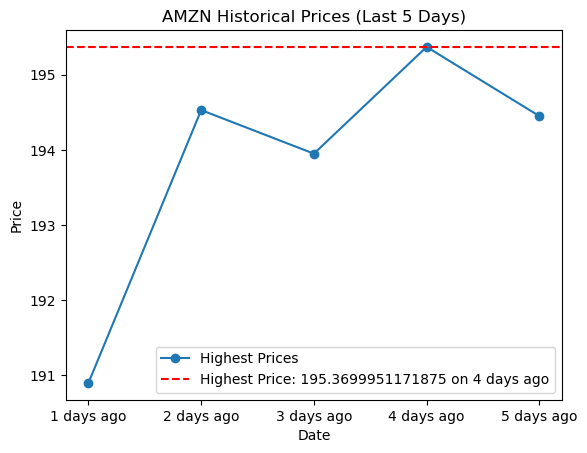

In [156]:
prices = historical_json['chart']['result'][0]['indicators']['quote'][0]['high']
dates = [f"{(len(prices) - i)} days ago" for i in range(len(prices))]

if prices:
    highest_price = max(prices)
    highest_price_index = prices.index(highest_price)
    highest_price_date = dates[highest_price_index]

    plt.plot(dates, prices, marker='o', label='Highest Prices')
    plt.gca().invert_xaxis()
    plt.axhline(y=highest_price, color='r', linestyle='--', label=f'Highest Price: {highest_price} on {highest_price_date}')
    plt.title(f"{stock} Historical Prices (Last 5 Days)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
else:
    print("No price data available for plotting.")
    